<a href="https://colab.research.google.com/github/ifky06/PCVK/blob/main/Praktikum6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmad Rifki Fauzi**
# **TI-3B/04**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

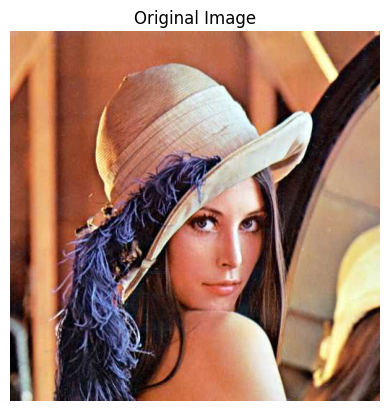

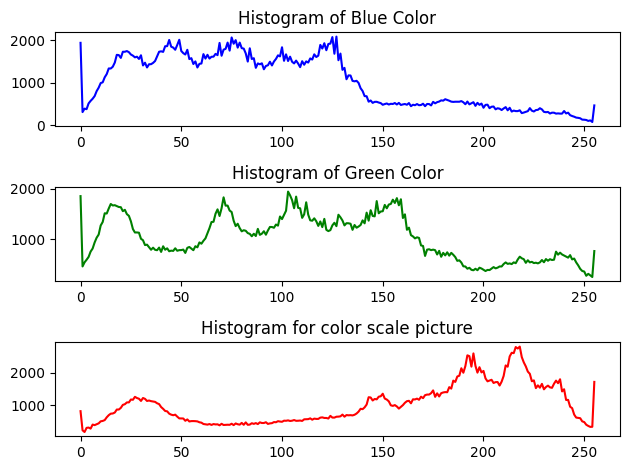

In [ ]:
img = cv.imread('images/lena.jpg')
# plt.hist(img.ravel(),256,[0,256]); plt.show()

# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

# Get RGB data from image
blue_color = cv.calcHist([img], [0], None, [256], [0, 256])
green_color = cv.calcHist([img], [1], None, [256], [0, 256])
red_color = cv.calcHist([img], [2], None, [256], [0, 256])

# separate histogram for each color
plt.subplot(3,1,1)
plt.title("Histogram of Blue Color")
plt.plot(blue_color, color='b')
plt.subplot(3,1,2)
plt.title("Histogram of Green Color")
plt.plot(green_color, color='g')
plt.subplot(3,1,3)
plt.title("Histogram of Red Color")
plt.plot(red_color, color='r')
plt.title("Histogram for color scale picture")
plt.tight_layout()
plt.show()


4. buatlah histogram citra yang sama akan tetapi
 menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

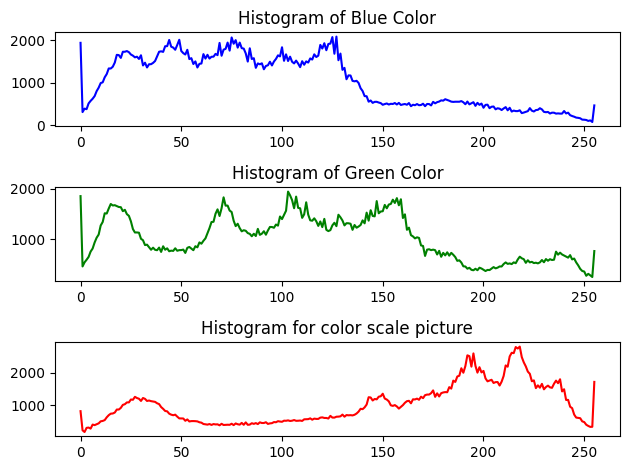

In [ ]:
#

# Get RGB data from image
blue_color = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_color = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
red_color = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# separate histogram for each color
plt.subplot(3,1,1)
plt.title("Histogram of Blue Color")
plt.plot(blue_color[0], color='b')
plt.subplot(3,1,2)
plt.title("Histogram of Green Color")
plt.plot(green_color[0], color='g')
plt.subplot(3,1,3)
plt.title("Histogram of Red Color")
plt.plot(red_color[0], color='r')
plt.title("Histogram for color scale picture")
plt.tight_layout()
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

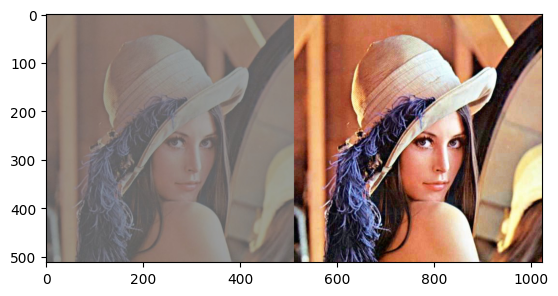

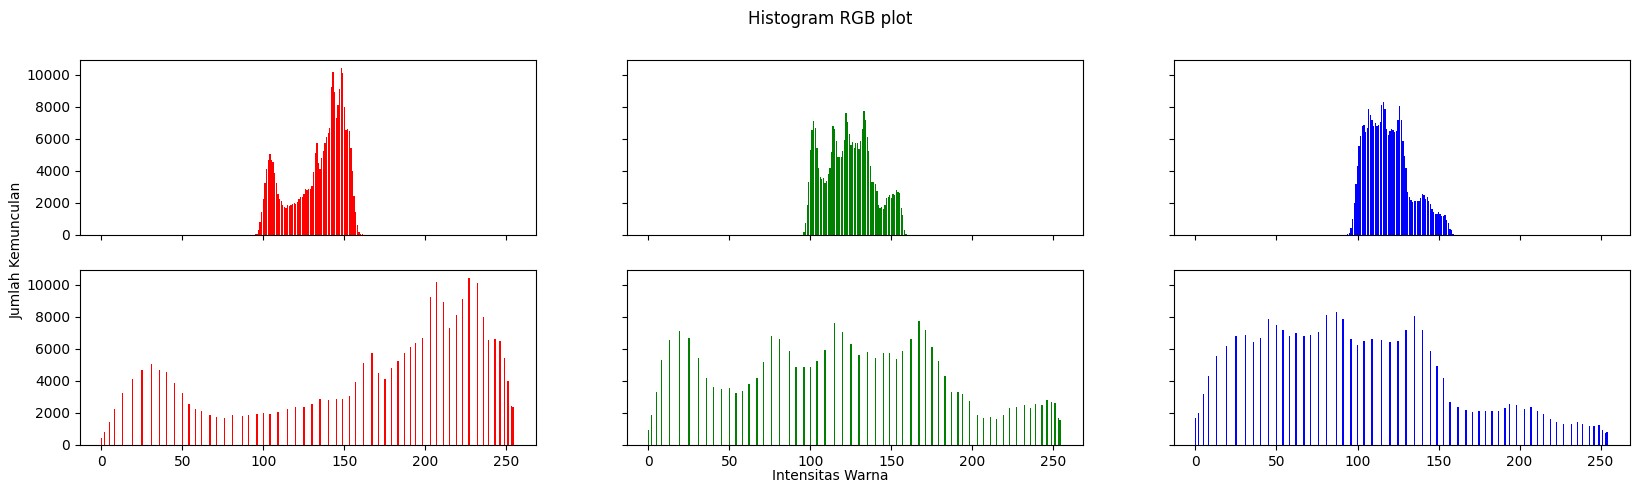

In [ ]:
img1 = cv.imread('images/lena_lc.jpg')
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3,256))
    for y in range(0,height) :
        for x in range(0,width) :
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

height, width, depth = np.shape(img1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
    for x in range(0,width):
        blue[img1[y][x][0]] += 1
        green[img1[y][x][1]] += 1
        red[img1[y][x][2]] += 1


histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((cv.cvtColor(img1,cv.COLOR_BGR2RGB), cv.cvtColor(img2,cv.COLOR_BGR2RGB))) #concatenate image
plt.imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
    fig. suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

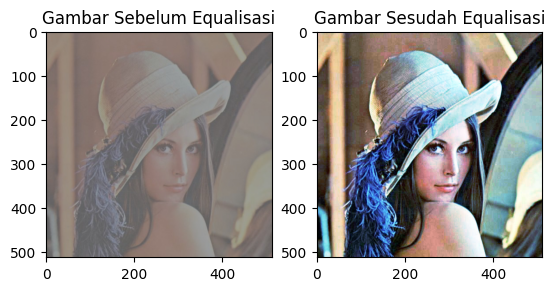

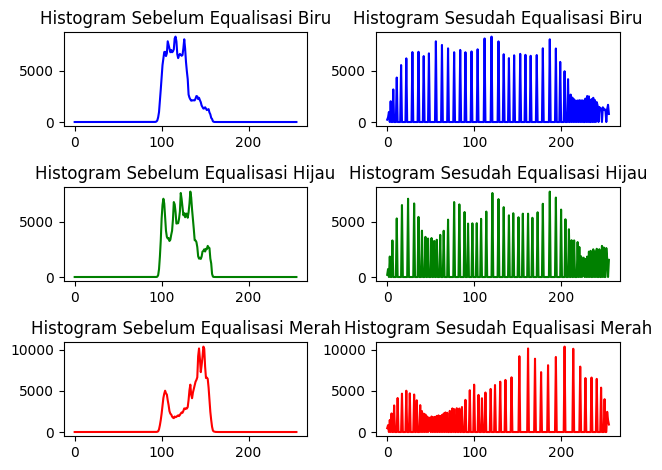

In [ ]:
# Baca gambar
image = cv.imread('images/lena_lc.jpg')

# memisahkan saluran warna
blue_channel, green_channel, red_channel = cv.split(image)

# Equalization histogram pada setiap saluran warna
blue_equalized = cv.equalizeHist(blue_channel)
green_equalized = cv.equalizeHist(green_channel)
red_equalized = cv.equalizeHist(red_channel)

# Gabungkan kembali setiap saluran warna
equalized_image = cv.merge((blue_equalized, green_equalized, red_equalized))

# Hitung histogram sebelum dan sesudah equalisasi
hist_before_blue = cv.calcHist([image], [0], None, [256], [0, 256])
hist_before_green = cv.calcHist([image], [1], None, [256], [0, 256])
hist_before_red = cv.calcHist([image], [2], None, [256], [0, 256])
hist_after_blue = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
hist_after_green = cv.calcHist([equalized_image], [1], None, [256], [0, 256])
hist_after_red = cv.calcHist([equalized_image], [2], None, [256], [0, 256])

# Tampilkan gambar sebelum dan sesudah equalisasi
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Sebelum Equalisasi')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Sesudah Equalisasi')

plt.show()

# Tampilkan histogram sebelum dan sesudah equalisasi pisahkan setiap warnanya
plt.subplot(3, 2, 1)
plt.plot(hist_before_blue, color='b')
plt.title('Histogram Sebelum Equalisasi Biru')

plt.subplot(3, 2, 2)
plt.plot(hist_after_blue, color='b')
plt.title('Histogram Sesudah Equalisasi Biru')

plt.subplot(3, 2, 3)
plt.plot(hist_before_green, color='g')
plt.title('Histogram Sebelum Equalisasi Hijau')

plt.subplot(3, 2, 4)
plt.plot(hist_after_green, color='g')
plt.title('Histogram Sesudah Equalisasi Hijau')

plt.subplot(3, 2, 5)
plt.plot(hist_before_red, color='r')
plt.title('Histogram Sebelum Equalisasi Merah')

plt.subplot(3, 2, 6)
plt.plot(hist_after_red, color='r')
plt.title('Histogram Sesudah Equalisasi Merah')

plt.tight_layout()

plt.show()


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

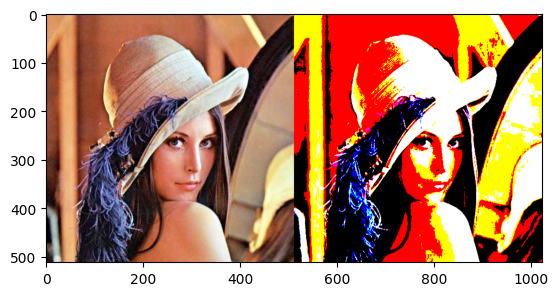

In [ ]:

# Baca gambar
image = cv.imread('images/lena.jpg')

def warnaTerdekat (r,g,b):
    pValue = 0
    minDistance = 255*255 + 255*255 + 255*255 + 1
    warnaPalette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[0,255,255],[255,0,255],[255,255,255]]

    for i in range (len(warnaPalette)):
        distance = (r-warnaPalette[i][0])*(r-warnaPalette[i][0]) + (g-warnaPalette[i][1])*(g-warnaPalette[i][1]) + (b-warnaPalette[i][2])*(b-warnaPalette[i][2])
        if (distance < minDistance):
            minDistance = distance
            pValue = i
    return pValue

warnaPalette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[0,255,255],[255,0,255],[255,255,255]]
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img3 = np.zeros((original.shape[0], original.shape[1], 3), np.uint8)

for y in range (original.shape[0]):
    for x in range (original.shape[1]):
        baru = warnaTerdekat(original[y, x, 0], original[y, x, 1], original[y, x, 2])
        img3[y, x] = warnaPalette[baru]

final_frame = cv.hconcat((original, img3)) #concatenate image
plt.imshow(final_frame)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

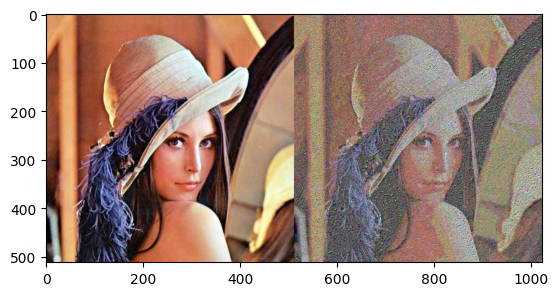

In [ ]:
# Baca gambar
original = cv.imread('images/lena.jpg')

# Konversi gambar ke skala abu-abu
dithered_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)


# Loop melalui setiap piksel dalam gambar
for y in range(dithered_image.shape[0]):
    for x in range(dithered_image.shape[1]):
        old_pixel_blue = dithered_image[y, x, 0]
        old_pixel_green = dithered_image[y, x, 1]
        old_pixel_red = dithered_image[y, x, 2]

        #menghitung pixel baru berdasar jarak dan juga batasan warna yang dimilik
        new_pixel_blue = 0 if old_pixel_blue < 128 else 255  # Konversi ke mode biner
        new_pixel_green = 0 if old_pixel_green < 128 else 255  # Konversi ke mode biner
        new_pixel_red = 0 if old_pixel_red < 128 else 255  # Konversi ke mode biner
        # new_pixel = 0 if old_pixel < 128 else 255  # Konversi ke mode biner

        #Menghitung kuantitasi error untuk masuk rumus
        error_blue = old_pixel_blue - new_pixel_blue
        error_green = old_pixel_green - new_pixel_green
        error_red = old_pixel_red - new_pixel_red

        #Lakukan untuk semua channel warna
        #Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x < dithered_image.shape[1] - 1:
            dithered_image[y, x + 1, 0] = dithered_image[y, x + 1, 0] + error_blue * 7 / 16
            dithered_image[y, x + 1, 1] = dithered_image[y, x + 1, 1] + error_green * 7 / 16
            dithered_image[y, x + 1, 2] = dithered_image[y, x + 1, 2] + error_red * 7 / 16
        if x > 0 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x - 1, 0] = dithered_image[y + 1, x - 1, 0] + error_blue * 3 / 16
            dithered_image[y + 1, x - 1, 1] = dithered_image[y + 1, x - 1, 1] + error_green * 3 / 16
            dithered_image[y + 1, x - 1, 2] = dithered_image[y + 1, x - 1, 2] + error_red * 3 / 16
        if y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x, 0] = dithered_image[y + 1, x, 0] + error_blue * 5 / 16
            dithered_image[y + 1, x, 1] = dithered_image[y + 1, x, 1] + error_green * 5 / 16
            dithered_image[y + 1, x, 2] = dithered_image[y + 1, x, 2] + error_red * 5 / 16
        if x < dithered_image.shape[1] - 1 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x + 1, 0] = dithered_image[y + 1, x + 1, 0] + error_blue * 1 / 16
            dithered_image[y + 1, x + 1, 1] = dithered_image[y + 1, x + 1, 1] + error_green * 1 / 16
            dithered_image[y + 1, x + 1, 2] = dithered_image[y + 1, x + 1, 2] + error_red * 1 / 16

# Tampilkan gambar hasil dithering
final_frame = cv.hconcat((cv.cvtColor(original, cv.COLOR_BGR2RGB), dithered_image))  #concatenate image
plt.imshow(final_frame)



9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

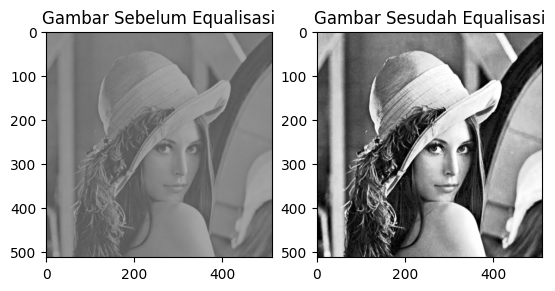

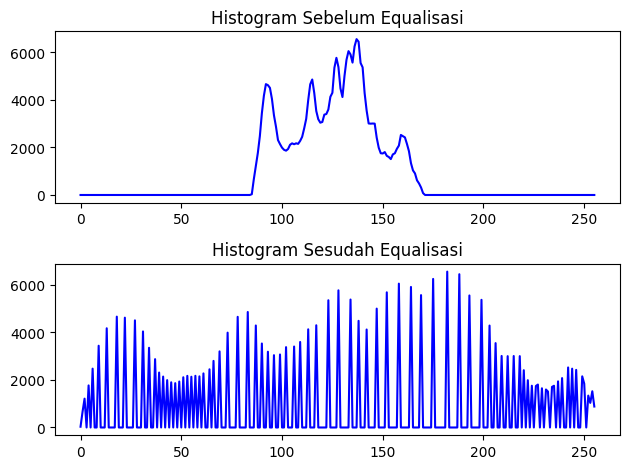

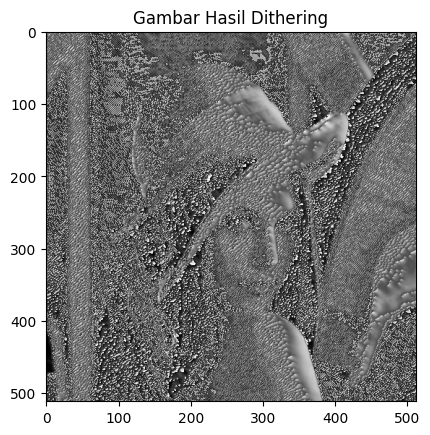

In [ ]:
# lakukan histogram equalization pada gambar grayscale
# Baca gambar
image = cv.imread('images/lena_gs_lc.png')

# Konversi gambar ke skala abu-abu
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Equalization histogram
equalized_image = cv.equalizeHist(gray_image)

# Hitung histogram sebelum dan sesudah equalisasi
hist_before = cv.calcHist([gray_image], [0], None, [256], [0, 256])

hist_after = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Tampilkan gambar sebelum dan sesudah equalisasi
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Sebelum Equalisasi')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Gambar Sesudah Equalisasi')

plt.show()

# Tampilkan histogram sebelum dan sesudah equalisasi
plt.subplot(2, 1, 1)
plt.plot(hist_before, color='b')
plt.title('Histogram Sebelum Equalisasi')

plt.subplot(2, 1, 2)
plt.plot(hist_after, color='b')
plt.title('Histogram Sesudah Equalisasi')

plt.tight_layout()

plt.show()


# Konversi gambar ke skala abu-abu
gray_image = equalized_image.copy()

# Inisialisasi gambar hasil dithering
dithered_image = np.zeros_like(gray_image)

# Loop melalui setiap piksel dalam gambar
for y in range(gray_image.shape[0]):
    for x in range(gray_image.shape[1]):
        old_pixel = gray_image[y, x]

        #menghitung pixel baru berdasar jarak dan juga batasan warna yang dimilik
        new_pixel = 0 if old_pixel < 75 else 255  # Konversi ke mode biner

        #Menghitung kuantitasi error untuk masuk rumus
        error = old_pixel - new_pixel

        #Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x < gray_image.shape[1] - 1:
            gray_image[y, x + 1] = gray_image[y, x + 1] + error * 8 / 16
        if x > 0 and y < gray_image.shape[0] - 1:
            gray_image[y + 1, x - 1] = gray_image[y + 1, x - 1] + error * 1 / 16
        if y < gray_image.shape[0] - 1:
            gray_image[y + 1, x] = gray_image[y + 1, x] + error * 5 / 16
        if x < gray_image.shape[1] - 1 and y < gray_image.shape[0] - 1:
            gray_image[y + 1, x + 1] = gray_image[y + 1, x + 1] + error * 1 / 16

# Tampilkan gambar hasil dithering
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Hasil Dithering')

plt.show()
